In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

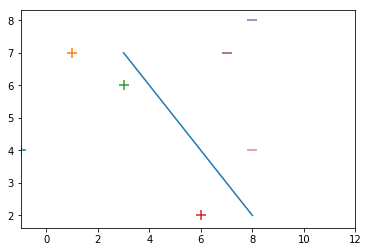

In [2]:
# bias variable
X = np.array([
    [-1,4,-1],
    [1,7,-1],
    [3,6,-1],
    [6,2,-1],
    [8,8,-1],
    [7,7,-1],
    [8,4,-1]
])

y = np.array([1,1,1,1,-1,-1,-1])

for i,sample in enumerate(X):
    if i < 4:
        plt.scatter(sample[0], sample[1], marker='+', s=100)
    else:
        plt.scatter(sample[0], sample[1], marker='_', s=100)

plt.xlim(-1,12)
plt.plot([3,8],[7,2])

In [99]:
def svm_gd(X,y, nb_epoch):
    
    eta = 1
    w = np.zeros([3])
    
    errors = []
    
    for epoch in range(1,nb_epoch):
        error = 0
        
        for i in range(len(X)):
            if np.any(y[i] * (np.dot(X[i],w)) < 1):
                w = w + eta * ((y[i] * X[i]) + (-2 * (1 / epoch) * w))
#                 print("Inside If")
                error = 1
            else:
                w = w + eta * (-2 * (1/epoch) * w)
#                 print("Inside Else")
            
        errors.append(error)
    
    return errors, w
    

In [100]:
err, weight = svm_gd(X,y,100000)

In [101]:
len(err)

99999

(-0.5, 1.5)

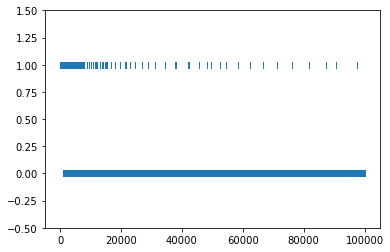

In [104]:
plt.plot(err,'|')
plt.ylim(-0.5,1.5)

In [81]:
# w = np.zeros([3])
# eta = 0.1
# nb_epoch = 1000
# for epoch in range(1,nb_epoch):
#     for i in range(len(X)):
#         if np.any(y[i] * (np.dot(X[i],w)) < 1):
#             w = w + eta * ((y[i] * X[i]) + (-2 * (1 / epoch) * w) )
#             print(w)
#         else:
#             w = w + eta * (-2 * (1/epoch) * w)
#             print("Inside Else..........")
#             print(w)

In [105]:
weight

array([ -6.7616946 ,   0.16527797, -44.31588331])

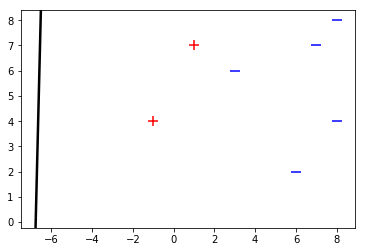

In [106]:
for i, sample in enumerate(X):
    
    if i < 2:
        plt.scatter(sample[0], sample[1], marker='+', s=120, c='r')
    
    else:
        plt.scatter(sample[0], sample[1], marker='_', s=120, c='b')
        
        
x2 = np.array([weight[0], weight[1], -weight[1], weight[0]])
x3 = np.array([weight[0], weight[1], weight[1], -weight[0]])

x2x3 = np.array([x2,x3])

X,Y,U,V = zip(*x2x3)

axes = plt.gca()

axes.quiver(X,Y,U,V, scale=1)